<a id='top'></a>
# Barabassi Albert model and scale free

### Table of Contents 

   1.[The Dataframe ](#data)<br>
   2.[Undirected Network base statistics ](#undirect)<br>
   3.[Barabasi-Albert (scale-free) graphs](#ba)<br>
   

In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import networkx as nx
import warnings
import scipy.stats as stats
import powerlaw
import math
from collections import defaultdict
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

<a id="dataframe"></a>
### The Dataframe  ([to top](#top))
We have examined the "data_subreddit_cleaned.csv" dataframe, not yet transformed into Directed Graph or Undirected grap.<br>
This choice was made in order not to significantly alter the raw data downloaded. We want to analyze our network without too much manipulation.

In [3]:
df2 = pd.read_csv("scraping data/data/data_subreddit_cleaned.csv")


We delete from the dataframe the columns  that we are not using. We then delete the "id", 'from', 'Unnamed: 0'columns.<br>
We delete also the  links pointing to the same node.

In [4]:
#delete the columns "id",'from','Unnamed: 0' 

df=df2.copy()
columns2remove = ['id', 'from','Unnamed: 0']
df.drop(columns2remove, inplace=True, axis=1)


In [5]:
print('Number of rows =',df.shape[0],', Number of columns =',df.shape[1])
'''"list_indx" is a list of dataframe row indices, which contain the "parent" attribute equal to the "to" attribute -
   The list is sorted in descending order, thus eliminating the rows in descending order.
   In this way, each row of the dataframe retains the original index to be deleted'''

list_indx=sorted(df[df["parent"]== df["to"]].index,reverse=True)

Number of rows = 199205 , Number of columns = 6


In [6]:
list_indx=sorted(df[df["parent"]== df["to"]].index,reverse=True)

df.drop(df.index[list_indx])
print( 'We deleted ',len(list_indx),' Rows from the dataframe df')

We deleted  0  Rows from the dataframe df


### The Undirect graph g

In [7]:
g=[]
g = nx.from_pandas_edgelist(df, source='parent', target='to',create_using=nx.Graph)

<a id="undirect"></a>
## Undirected Network base statistics ([to top](#top))
In this case we considered our Network Not Direct, and the statistics are of a Undirected graph.<br>

#### Degree distribution with powerlaw fit for the Undirect Network g
In the following figures we can see the BA model on the left the its distribution in
degrees , in the center the cumulative distribution function (CDF) and on the left the
Derived functions the complementary cumulative distribution function (CCDF) or
simply the tail distribution.
The


Calculating best minimal value for power law fit


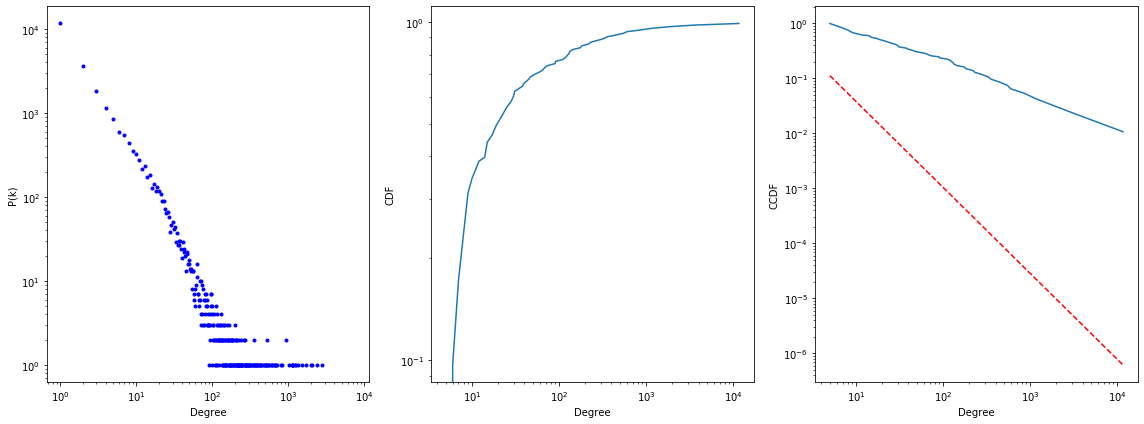

alpha=2.56289201096872 sigma=0.0583691824724231

 Degree distribution with powerlaw fit of Real Undirect graph g 


In [8]:
plot_dist(g)
print('\n Degree distribution with powerlaw fit of Real Undirect graph g ')

#### Most important statistics of graph g

In [9]:
N=[]; L=[]; avg_deg=[]; k_max=[] ;type_g=[] ;cluster=[]; density=[];
N, L = g.order(), g.size()
avg_deg = (2*L)/ N

deg=[]
for tup in nx.degree(g):
    deg.append(tup[1])
    
k_max=max(deg)
k_min=min(deg)
type_g= g.is_directed()
print('The network g has:\n')
print('Is Directed:',type_g)
print("Nodes: ", N)
print("Edges: ", L)
print("Average degree: ", avg_deg)
print("Maximun degree: ", k_max)
print("Minimun degree: ", k_min)

# clustering and density analysis
cluster = nx.average_clustering(g)
density= nx.density(g)
print("Clustering Average:", cluster)
print("Average Density:",density)


The network g has:

Is Directed: False
Nodes:  24819
Edges:  104284
Average degree:  8.403561787340344
Maximun degree:  2754
Minimun degree:  1
Clustering Average: 0.16543294352606996
Average Density: 0.0003386075343436354


In [48]:
path_length1 = nx.average_shortest_path_length(g)


In [52]:
print("Average shortest path length:",path_length1)
print("Distribution: Power law")

Average shortest path length: 3.7361895432789143
Distribution: Power law


## Synthetic Networks 
``networkx`` allows to generate synthetic network datasets. 

## 1.Barabasi-Albert (scale-free) graphs

### Build  a sintetic network with the Barabassi Albert Model.
Configuration: N=24819 and m = 8

In [13]:
m = 8  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(N, m)
#nx.draw(ba)

#### Degree distribution with powerlaw fit (with m=8)


Calculating best minimal value for power law fit


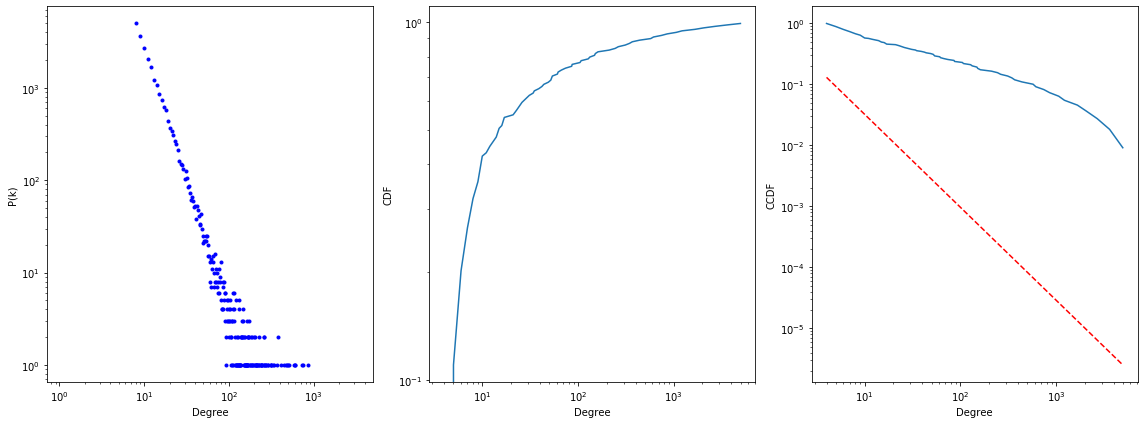

alpha=2.522851700853117 sigma=0.05008011023497018

 Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m=8


In [14]:
plot_dist(ba)
print('\n Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m=8')

In [15]:
N=[]; L=[]; avg_deg=[]; k_max=[] ;type_g=[] ;cluster=[]; density=[];
N, L = ba.order(), ba.size()
avg_deg = (2*L)/ N

deg=[]
for tup in nx.degree(ba):
    deg.append(tup[1])
    
k_max=max(deg)
k_min=min(deg)
type_g= ba.is_directed()
print('The sintetic network BA has:\n')
print('Is Directed:',type_g)
print("Nodes: ", N)
print("Edges: ", L)
print("Average degree: ", avg_deg)
print("Maximun degree: ", k_max)
print("Minimun degree: ", k_min)

# clustering and density analysis
cluster = nx.average_clustering(ba)
density= nx.density(ba)
print("Clustering Average:", cluster)
print("Average Density:",density)


The sintetic network BA has:

Is Directed: False
Nodes:  24819
Edges:  198488
Average degree:  15.994842660864661
Maximun degree:  851
Minimun degree:  8
Clustering Average: 0.00479033548481942
Average Density: 0.0006444855613210033


In [55]:
path_length3 = nx.average_shortest_path_length(ba)


In [56]:
print("Average shortest path length:",path_length3 )
print("Distribution: Power law")

Average shortest path length: 4.1833812900167135
Distribution: Power law


#### A distribution view of the distribution of indegree and outdegrre degrees in our direct graph

In [16]:

DG=[]
DG = nx.from_pandas_edgelist(df, source='parent', target='to',create_using=nx.DiGraph)

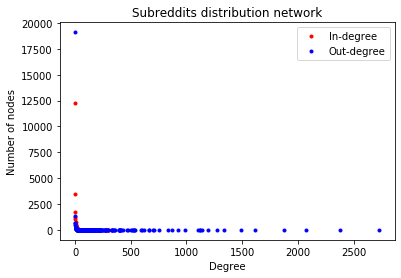

We see the distribution in logarithmic scales


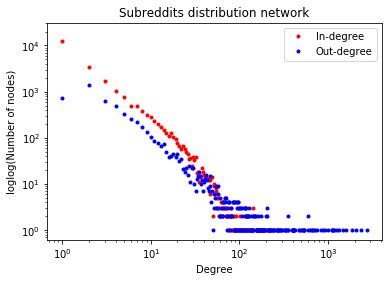

We see the distribution overlapping indegrees and outdegree individually


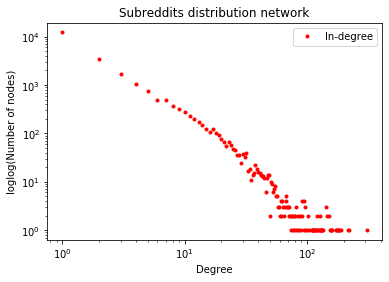

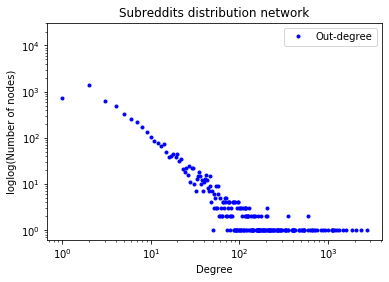

In [17]:
nnodes = DG.number_of_nodes()
degrees_in = [d for n, d in DG.in_degree()]
degrees_out = [d for n, d in DG.out_degree()]
avrg_degree_in = sum(degrees_in) / float(nnodes)
avrg_degree_out = sum(degrees_out) / float(nnodes)
 
in_values = sorted(set(degrees_in))
in_hist = [degrees_in.count(x) for x in in_values]
out_values = sorted(set(degrees_out))
out_hist = [degrees_out.count(x) for x in out_values]
 
plt.figure()
plt.plot(in_values,in_hist,'r.') # in-degree
plt.plot(out_values,out_hist,'b.') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Subreddits distribution network')
plt.show()


print('We see the distribution in logarithmic scales')

plt.figure()
plt.plot(in_values,in_hist,'r.') # in-degree
plt.plot(out_values,out_hist,'b.') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('loglog(Number of nodes)')
plt.title('Subreddits distribution network')
plt.loglog()
plt.show()

print('We see the distribution overlapping indegrees and outdegree individually')
plt.figure()
plt.plot(in_values,in_hist,'r.') # in-degree

plt.legend(['In-degree'])
plt.xlabel('Degree')
plt.ylabel('loglog(Number of nodes)')
plt.title('Subreddits distribution network')
plt.loglog()
plt.show()


plt.plot(out_values,out_hist,'b.') # out-degree
plt.legend(['Out-degree'])
plt.xlabel('Degree')
plt.ylabel('loglog(Number of nodes)')
plt.title('Subreddits distribution network')
plt.loglog()
plt.show()


As we see in the in and out degree distributions.<br>
Both contain hubs.<br>
The hubs with high indegree are smaller compared to hubs with high outdegree.<BR>
Furthermore, the degree in of the hubs oscillates between 10 at the second and 10 at the third, while the outdegree of the hubs present exceeds 10 at the third.<br>